In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
#!pip install pandas 

In [3]:
# 
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
len(df)

299

In [7]:
diabetes_death_df = df[ (df['diabetes']== 1) & (df['DEATH_EVENT']== 1) ]
len(diabetes_death_df)

40

In [8]:
diabetes_death_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
19,48.0,1,582,1,55,0,87000.00,1.90,121,0,0,15,1
21,65.0,1,128,1,30,1,297000.00,1.60,136,0,0,20,1
24,75.0,0,582,1,30,1,263358.03,1.83,134,0,0,23,1


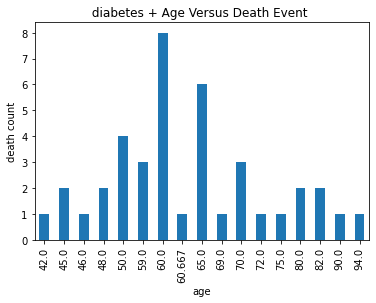

In [9]:
# diabetes + Age Versus Death Event ?
diabetes_death_df.groupby(by = 'age')['DEATH_EVENT'].count().plot.bar(ylabel = 'death count' ,title = ' diabetes + Age Versus Death Event  ')
plt.show()

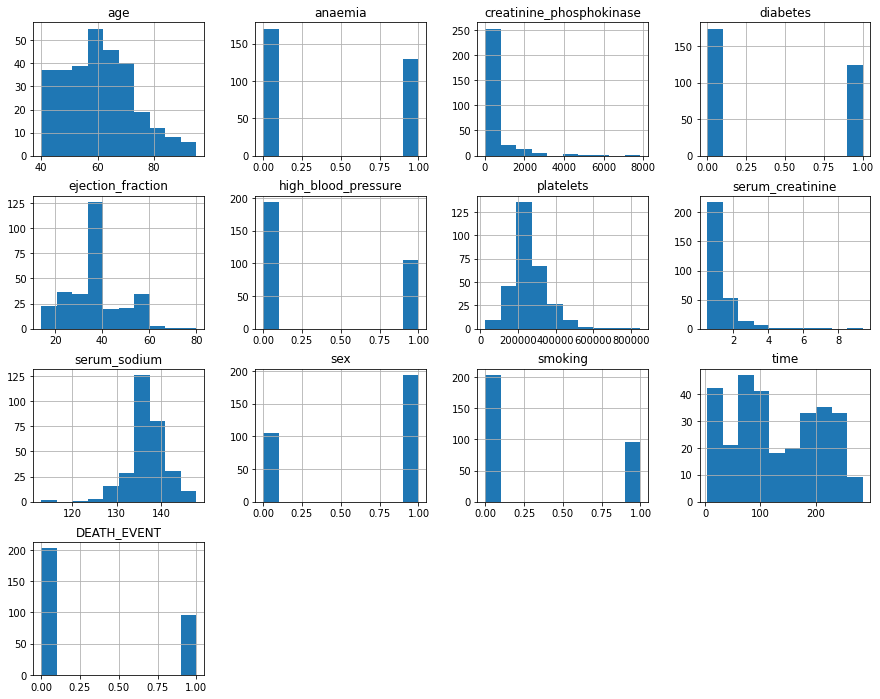

In [10]:
df.hist(figsize=(15,12))
plt.show()

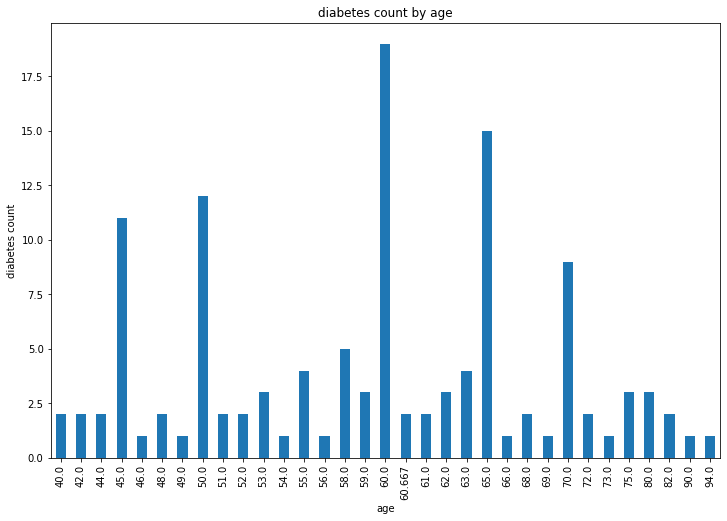

In [11]:
diabetes_df = df[df['diabetes']==1]
diabetes_df.groupby(by='age')['age'].count().plot.bar(ylabel = 'diabetes count' , title = 'diabetes count by age' , figsize = (12,8))
plt.show()

In [13]:
diabetes_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
7,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,10,1
19,48.0,1,582,1,55,0,87000.0,1.9,121,0,0,15,1
21,65.0,1,128,1,30,1,297000.0,1.6,136,0,0,20,1
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


In [14]:
def process_age_range(age):
    if age >65:
        return 65
    return age

In [15]:
# People aged 65 and above are considered senior citizens and are grouped as 65
diabetes_df.loc[:,'age_range'] = diabetes_df['age'] // 5 * 5
diabetes_df.loc[:,'age_range'] = diabetes_df['age_range'].apply(process_age_range)

/var/folders/9z/_369t2pd7hs_tvn8zm6s8qm00000gn/T/ipykernel_5792/1454186706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_df.loc[:,'age_range'] = diabetes_df['age'] // 5 * 5


In [16]:
diabetes_age_count_df = diabetes_df.groupby(by='age_range')['age_range'].count().reset_index(name = 'count')
diabetes_age_count_df

,age_range,count
0,40.0,6
1,45.0,15
2,50.0,20
3,55.0,13
4,60.0,30
5,65.0,41


In [18]:
diabetes_age_count_df.corr()

,age_range,count
age_range,1.00000,0.89627
count,0.89627,1.00000
